## Diabetes Predictor

Last week we started this task with a very clean dataset. This week we're going to continue but with a messier version of the original dataset

### Import all the necessary modules

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

### Load the dataset and have a look at the data
- Univariate analysis: numerical and visualisation

In [49]:
diabetes = pd.read_csv("messy_diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,0.0,72.0,0.0,0.0,NaN,0.627,50.0,YES
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,no
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,NaN
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,NO
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,yes


In [50]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               730 non-null    float64
 1   Glucose                   733 non-null    float64
 2   BloodPressure             731 non-null    float64
 3   SkinThickness             729 non-null    float64
 4   Insulin                   730 non-null    float64
 5   BMI                       734 non-null    float64
 6   DiabetesPedigreeFunction  726 non-null    float64
 7   Age                       727 non-null    float64
 8   Outcome                   725 non-null    object 
dtypes: float64(8), object(1)
memory usage: 56.8+ KB


In [51]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,730.000000,733.000000,731.000000,729.000000,730.000000,734.000000,726.000000,727.000000
mean,3.693151,114.594816,65.660739,19.677641,74.791781,30.483651,0.445532,31.755158
std,3.432130,41.557233,24.730710,16.593940,111.478198,10.527015,0.344853,13.906537
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,95.000000,62.000000,0.000000,0.000000,26.250000,0.220250,23.000000
50%,3.000000,114.000000,72.000000,22.000000,0.000000,31.900000,0.342500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,120.000000,36.375000,0.600750,40.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

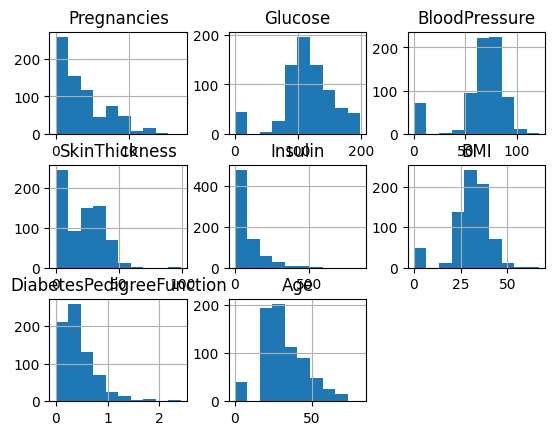

In [52]:
diabetes.hist()

<AxesSubplot:>

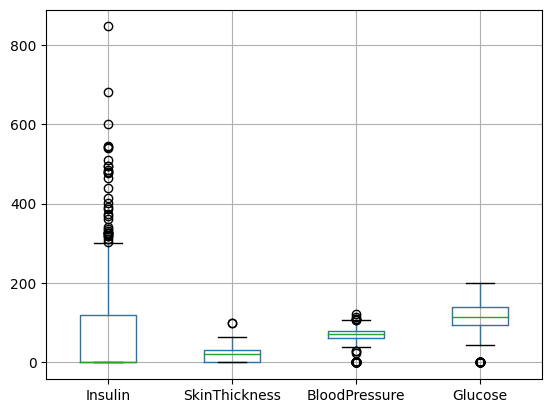

In [53]:
diabetes[["Insulin", "SkinThickness", "BloodPressure", "Glucose"]].boxplot()

### 1. Data Cleaning

- Standardise formatting: remove whitespace, consistent case and category
- Missing and Zero Data: numerical and categorical
- Duplicate Records
- Handle outliers

In [54]:
def clean_whitespace(value):
    """Removes leading and trailing spaces from string values."""
    if isinstance(value, str):
        return value.strip()
    return value

diabetes = diabetes.applymap(clean_whitespace)

/var/folders/67/w34t7wgn6_s13hb551pyr9vc0000gn/T/ipykernel_1346/2103514505.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  diabetes = diabetes.applymap(clean_whitespace)


In [55]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,0.0,72.0,0.0,0.0,NaN,0.627,50.0,YES
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,no
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,NaN
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,NO
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,yes


In [56]:
def case (value):
    if isinstance(value, str):
        return value.lower()
    return value

diabetes["Outcome"] = diabetes["Outcome"].apply(case)

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,0.0,72.0,0.0,0.0,NaN,0.627,50.0,yes
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,no
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,NaN
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,no
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,yes


In [57]:
diabetes.groupby("Outcome").count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
no,425,431,425,422,426,427,424,421
yes,234,232,237,235,230,234,227,229


In [58]:
# Fill missing numerical values with the column median
numeric_cols = diabetes.select_dtypes(include=['number']).columns
diabetes[numeric_cols] = diabetes[numeric_cols].apply(lambda x: x.fillna(x.median()))

In [59]:
# Fill missing categorical values with the most frequent value (mode)
diabetes[["Outcome"]] = diabetes[["Outcome"]].apply(lambda x: x.fillna(x.mode()[0]))

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

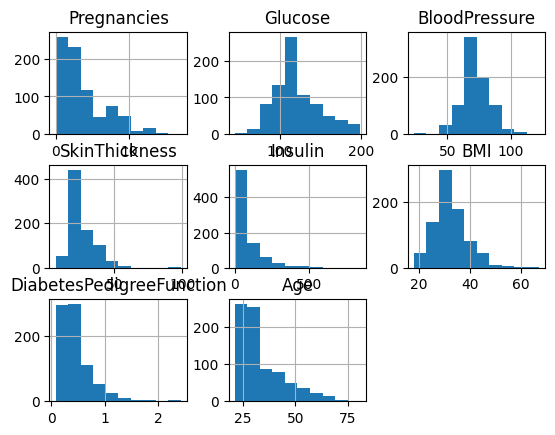

In [60]:
columns_with_invalid_zeros = ["Glucose", "BloodPressure", "BMI", "Insulin", "Age", "SkinThickness", "DiabetesPedigreeFunction"]
for col in columns_with_invalid_zeros:
    diabetes[col] = diabetes[col].replace(0, diabetes[col].median())  # Replace zeros with median value

diabetes.hist()

In [61]:
diabetes = diabetes.drop_duplicates()
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 785 entries, 0 to 803
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               785 non-null    float64
 1   Glucose                   785 non-null    float64
 2   BloodPressure             785 non-null    float64
 3   SkinThickness             785 non-null    float64
 4   Insulin                   785 non-null    float64
 5   BMI                       785 non-null    float64
 6   DiabetesPedigreeFunction  785 non-null    float64
 7   Age                       785 non-null    float64
 8   Outcome                   785 non-null    object 
dtypes: float64(8), object(1)
memory usage: 61.3+ KB


### 2. Data Preprocessing

- Encode categorical values
- Scale the features: choose based on distribution

In [62]:
diabetes["Outcome"] = diabetes["Outcome"].map({"no": 0, "yes": 1})


In [63]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 785 entries, 0 to 803
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               785 non-null    float64
 1   Glucose                   785 non-null    float64
 2   BloodPressure             785 non-null    float64
 3   SkinThickness             785 non-null    float64
 4   Insulin                   785 non-null    float64
 5   BMI                       785 non-null    float64
 6   DiabetesPedigreeFunction  785 non-null    float64
 7   Age                       785 non-null    float64
 8   Outcome                   785 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 61.3 KB


In [64]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,114.0,72.0,22.0,0.0,31.9,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,31.9,0.351,31.0,0
2,8.0,183.0,64.0,22.0,0.0,23.3,0.672,32.0,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [65]:
# Select numerical columns to scale
numeric_features = ["Glucose", "BloodPressure", "BMI", "Insulin", "Age"]

# Apply Standardization (Z-score)
scaler = StandardScaler()
diabetes[numeric_features] = scaler.fit_transform(diabetes[numeric_features])

diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,-0.236576,-0.058840,22.0,-0.623595,-0.096320,0.627,1.560581,1
1,1.0,-1.252735,-0.590774,29.0,-0.623595,-0.096320,0.351,-0.159114,0
2,8.0,2.181183,-0.768085,22.0,-0.623595,-1.427715,0.672,-0.068603,0
3,1.0,-1.112575,-0.590774,23.0,0.240408,-0.684611,0.167,-1.064216,0
4,0.0,0.569344,-2.895818,35.0,0.920581,1.637591,2.288,0.021907,1


### 3. EDA

<AxesSubplot:>

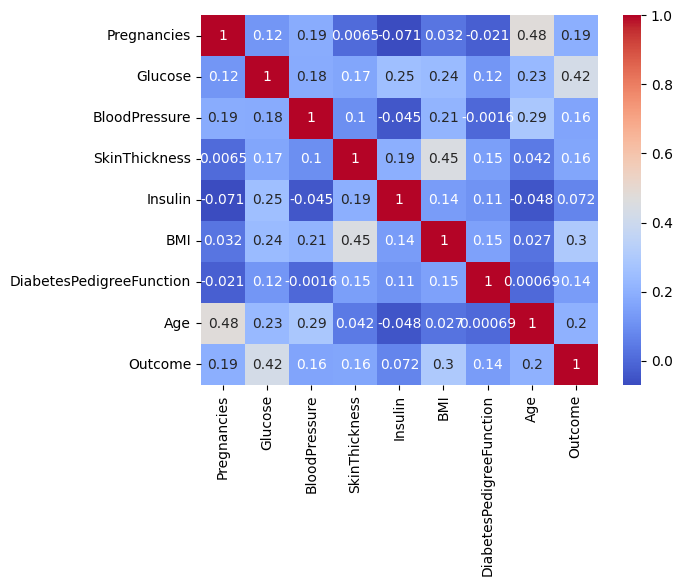

In [66]:
sns.heatmap(diabetes.corr(), annot=True, cmap="coolwarm")

### 4. Modelling

Linear Regression MSE: 0.8183138985455702


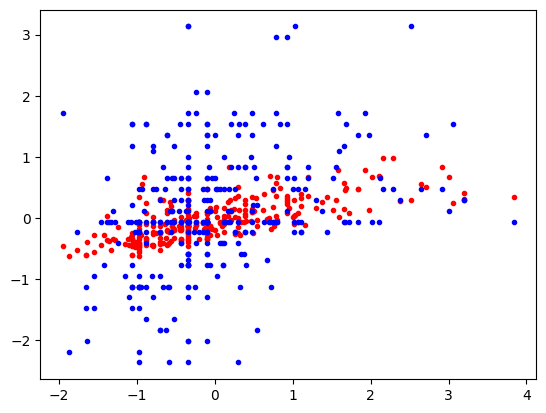

In [70]:
X = diabetes[["Age", "BMI"]]
y = diabetes["BloodPressure"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred))

plt.plot(X_test, y_pred, "r.")
plt.plot(X_test, y_test, "b.")

###